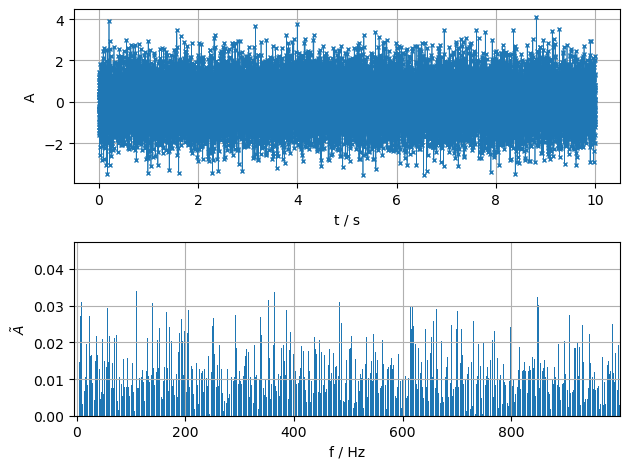

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


def calc_fft(ts, ys):
    length = len(ts)
    dt = ts[1] - ts[0]
    yfft = fft(ys)
    yfft = 2.0 / length * np.abs(yfft[0:length // 2])
    yfft[0] = yfft[0] / 2
    return (fftfreq(length, d=dt)[0:length // 2], yfft)


#Datensatzlänge:

dt = 1 / 2000
N = 20000
ts = np.arange(0, dt * N, dt)

f1 = 100
f2 = 90

ys = np.random.normal(size=N)

fig1, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(ts, ys, '-x', markersize=3, lw=0.5)
ax1.set(xlabel="t / s", ylabel="A")
ax1.grid()

freqs, yfft = calc_fft(ts, ys)
ax2.bar(freqs, yfft, (freqs[1] - freqs[0]) * 0.8)
ax2.set(xlim=[-5, max(freqs)])
ax2.set(xlabel="f / Hz", ylabel="$\\tilde{A}$")
ax2.grid()
fig1.tight_layout()
fig1.savefig('gausian_noise_spec')